# 필수라이브러리

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus = False)

sns.set_style('darkgrid')
sns.set(font="malgun gothic")


plt.rc('figure', figsize = (10, 8))
plt.rc('font', family = 'malgun gothic')

warnings.filterwarnings('ignore')

# 데이터 불러오기

In [129]:
df = pd.read_excel('C:/k_digital/source/data/Online_Retail.xlsx')

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. **주문번호**
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. **상품코드**
- Description: Product (item) name. Nominal. **상품명**
- Quantity: The quantities of each product (item) per transaction. Numeric. **수량**
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. **주문날짜**
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. **상품가격**
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. **고객아이디**
- Country: Country name. Nominal, the name of the country where each customer resides. **고객거주지역**



In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 데이터 기초 정보 확인

In [130]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- CustomerID에 누락된 값이 존재한다.
- 이는 비회원의 상품구매에 따른 누락으로 추정된다.

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- 상품의 수량과 가격의 최소값에 음수가 나와있다.
- 이는 이상치로 판단하여 제거해주는것이 좋아 보인다.

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Cleansing

In [131]:
# 누락된 고객ID 컬럼에 누락행을 제거
df = df[df.CustomerID.notnull()]
len(df)

406829

In [132]:
# Quantity와 UnitPrice 컬럼에 음수 행 제거
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]
len(df)

397884

In [133]:
df.info() ## 27.3+ MB 사용 메모리

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
df.CustomerID = df.CustomerID.astype(np.int32)
df.info()  ## 25.8+ MB 로 사용 메모리가 감소함(단 계산여부 등에 따라 변경여부를 심사숙고)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [26]:
df.CustomerID = df.CustomerID.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.2+ MB


- df.CustomerID = pd.to_numeric(df.CustomerID, downcast = 'integer') # int16
- 이러한 형태로 메모리를 확보하는 것을 '다운캐스트'라고 한다

In [137]:
df['Price'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [30]:
# 정제 완료된 데이터 저장
df.to_csv('online_retail.csv', index = False)

## 전체 매출과 국가별 매출 분석

In [138]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [139]:
df.Price.sum()

8911407.904

In [48]:
source = df.groupby('Country').sum()['Price'].sort_values()

In [55]:
source2 = df.groupby('Country').sum().sort_values('Price')

In [61]:
source2

,Quantity,UnitPrice,Price
Country,,,
Saudi Arabia,80,21.160,145.920
Bahrain,260,78.950,548.400
Czech Republic,671,78.270,826.740
RSA,351,248.100,1002.310
Brazil,356,142.600,1143.600
European Community,499,289.800,1300.250
Lithuania,652,99.440,1661.060
Lebanon,386,242.440,1693.880
United Arab Emirates,982,229.890,1902.280


In [59]:
source.index

Index(['Saudi Arabia', 'Bahrain', 'Czech Republic', 'RSA', 'Brazil',
       'European Community', 'Lithuania', 'Lebanon', 'United Arab Emirates',
       'Unspecified', 'Malta', 'USA', 'Canada', 'Iceland', 'Greece', 'Israel',
       'Poland', 'Austria', 'Cyprus', 'Italy', 'Denmark', 'Channel Islands',
       'Singapore', 'Finland', 'Portugal', 'Norway', 'Japan', 'Sweden',
       'Belgium', 'Switzerland', 'Spain', 'Australia', 'France', 'Germany',
       'EIRE', 'Netherlands', 'United Kingdom'],
      dtype='object', name='Country')

<BarContainer object of 37 artists>

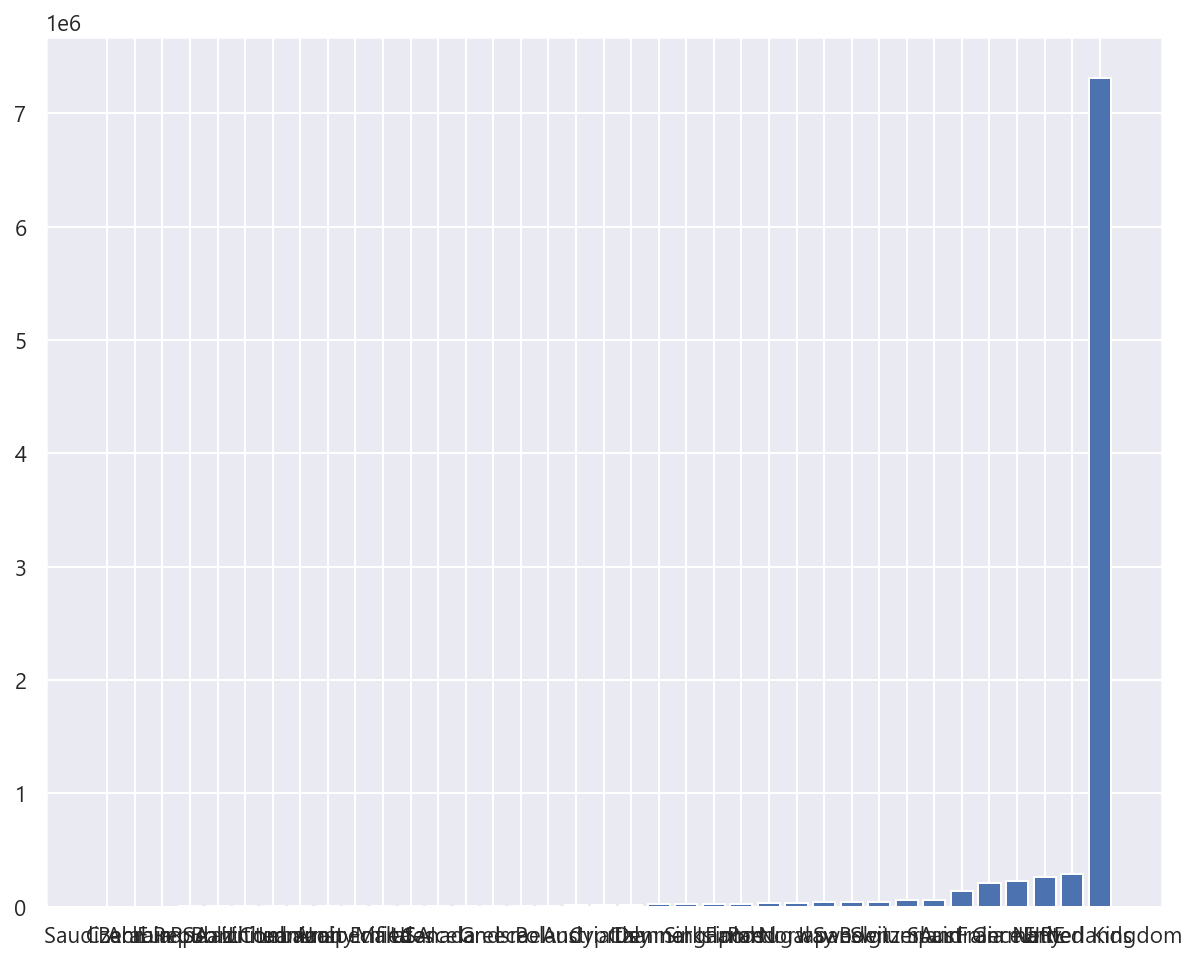

In [60]:
plt.bar(source2.index, source2['Price'])

<BarContainer object of 10 artists>

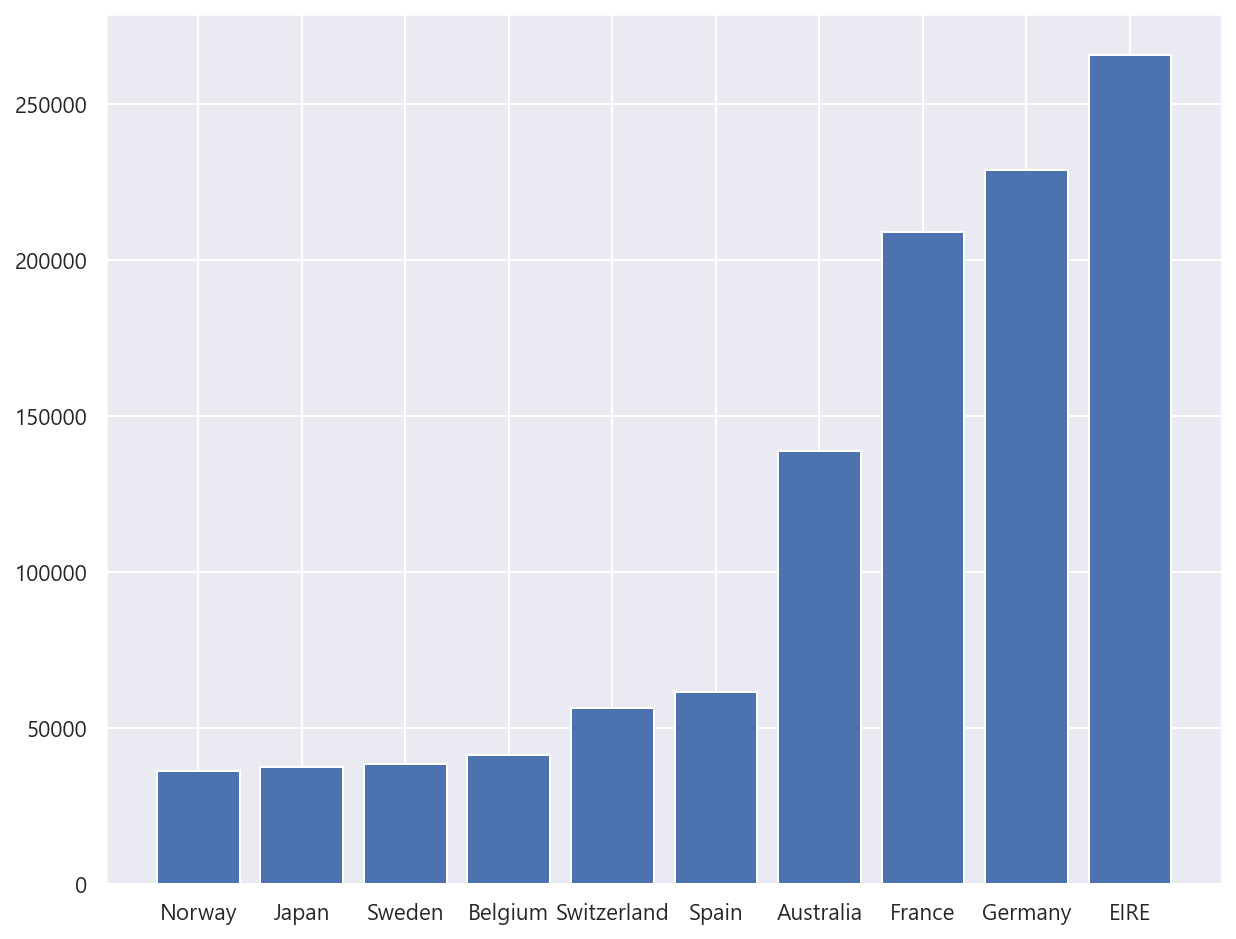

In [66]:
source2 = df.groupby('Country').sum().sort_values('Price')
plt.bar(source2.index[-12:-2], source2['Price'][-12:-2])

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

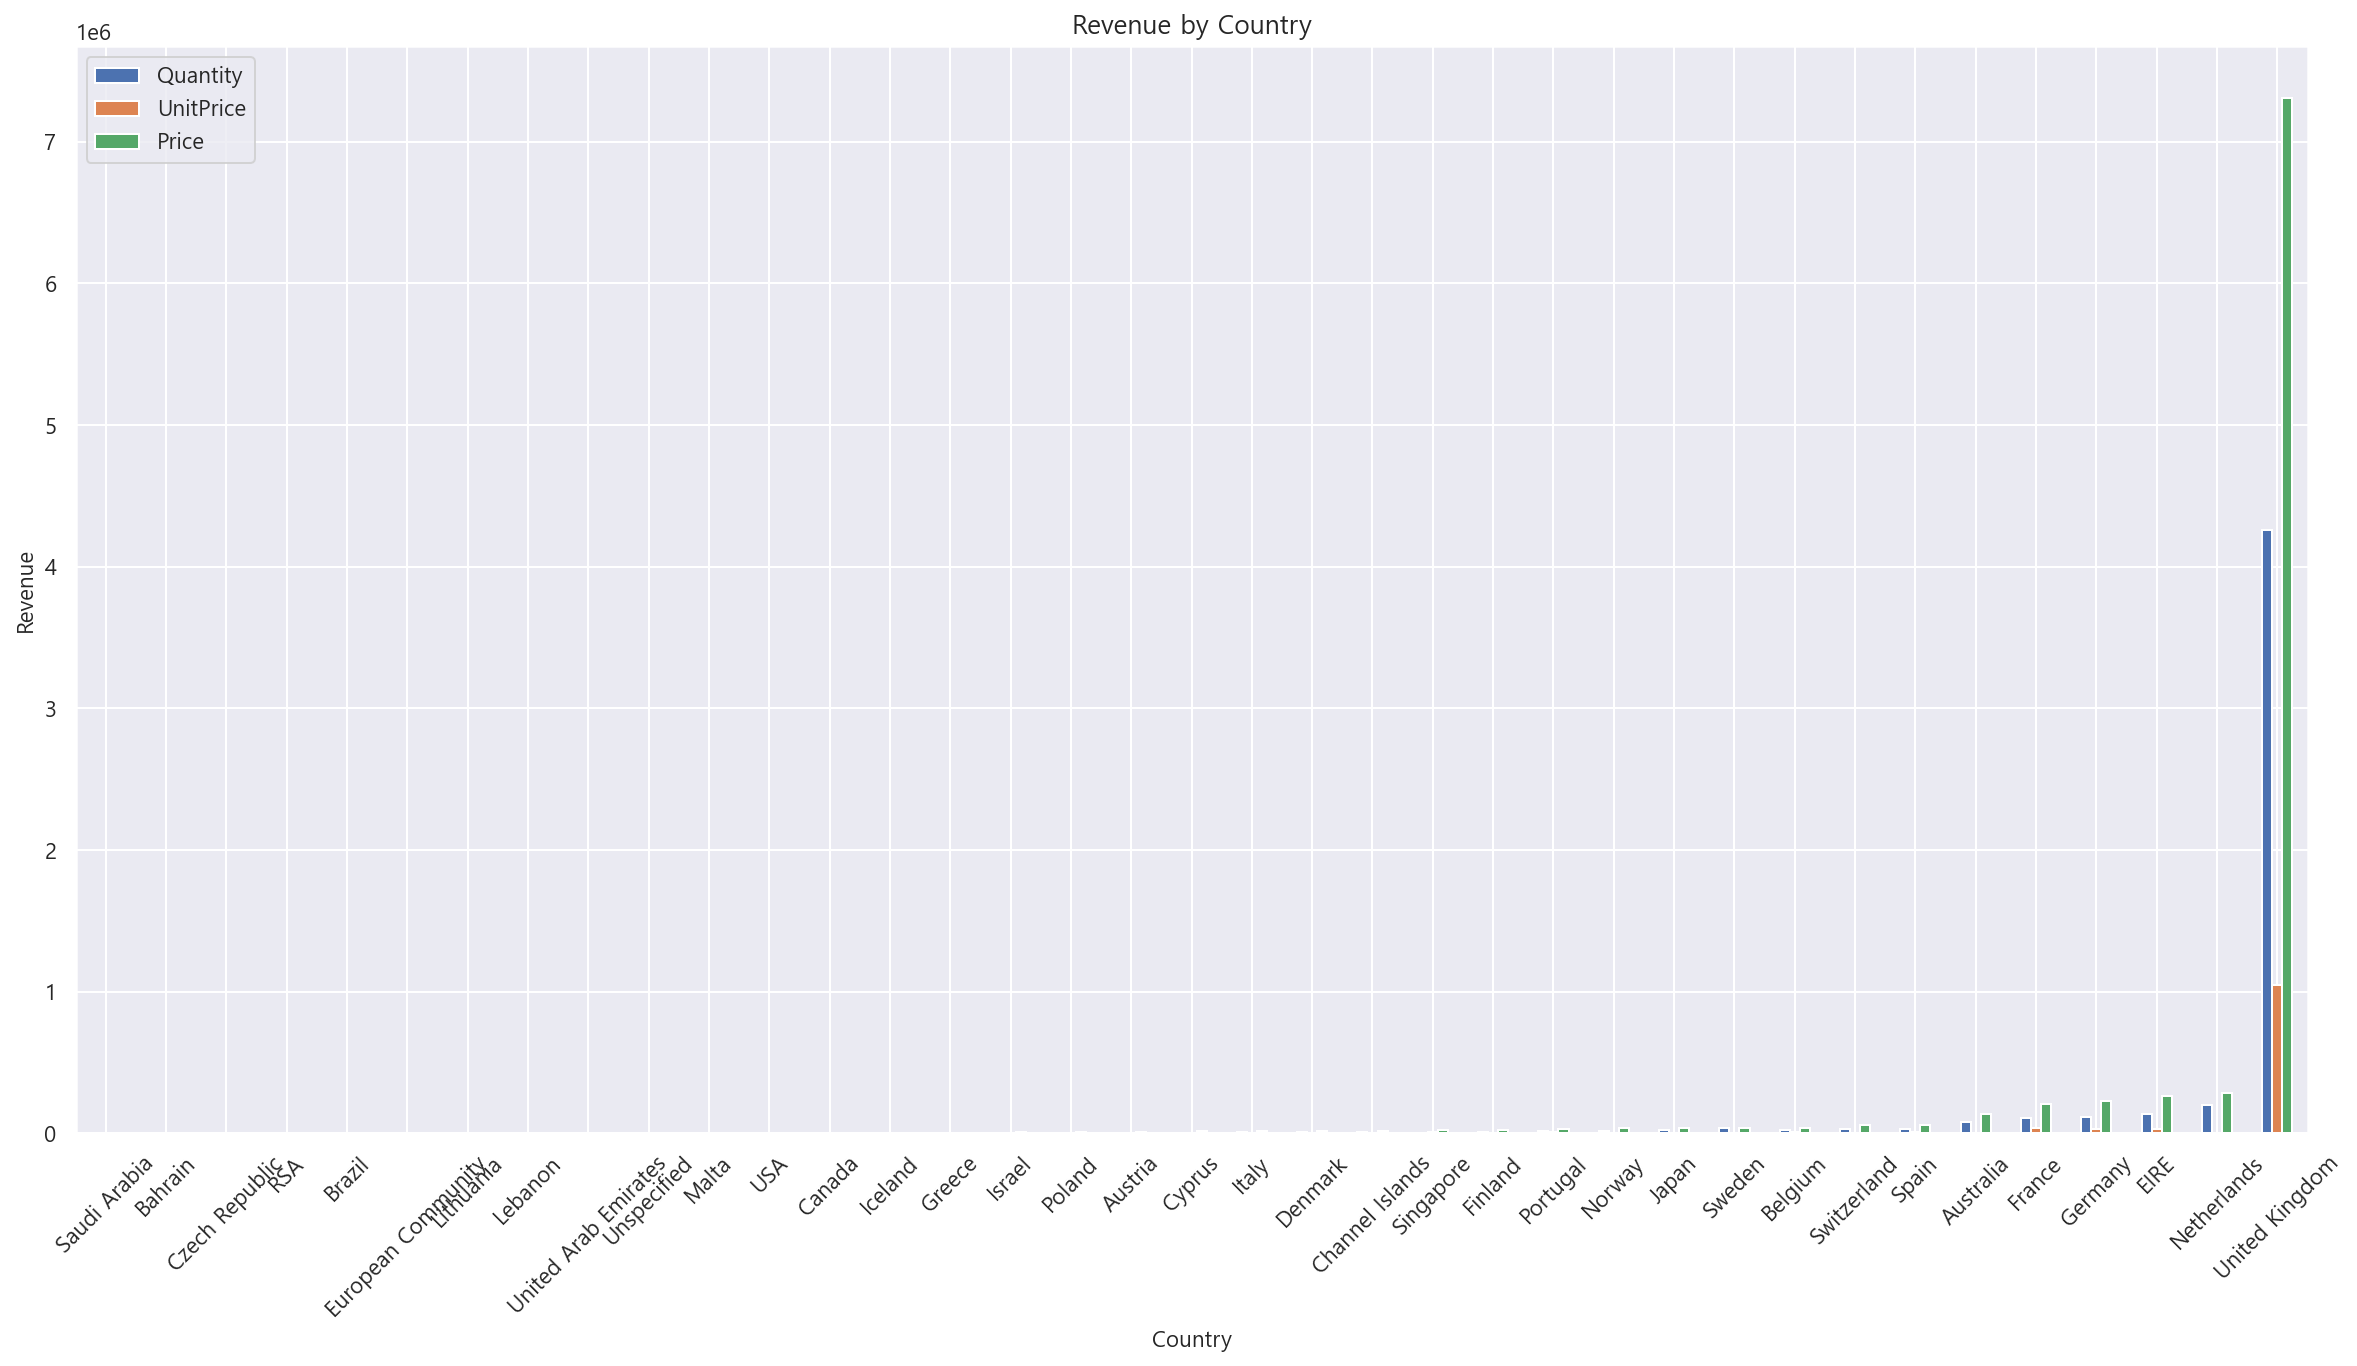

In [67]:
plot = source2.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('Country',fontsize=11)
plot.set_ylabel('Revenue',fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=source2.index, rotation=45)

In [140]:
plot=(rev_by_countries/total_revenue).plot(kind='pie',figsize=(20,10))

NameError: name 'rev_by_countries' is not defined

In [141]:
data = df[:]

## 연월별 매출, 요일별 매출

### 연월별 매출

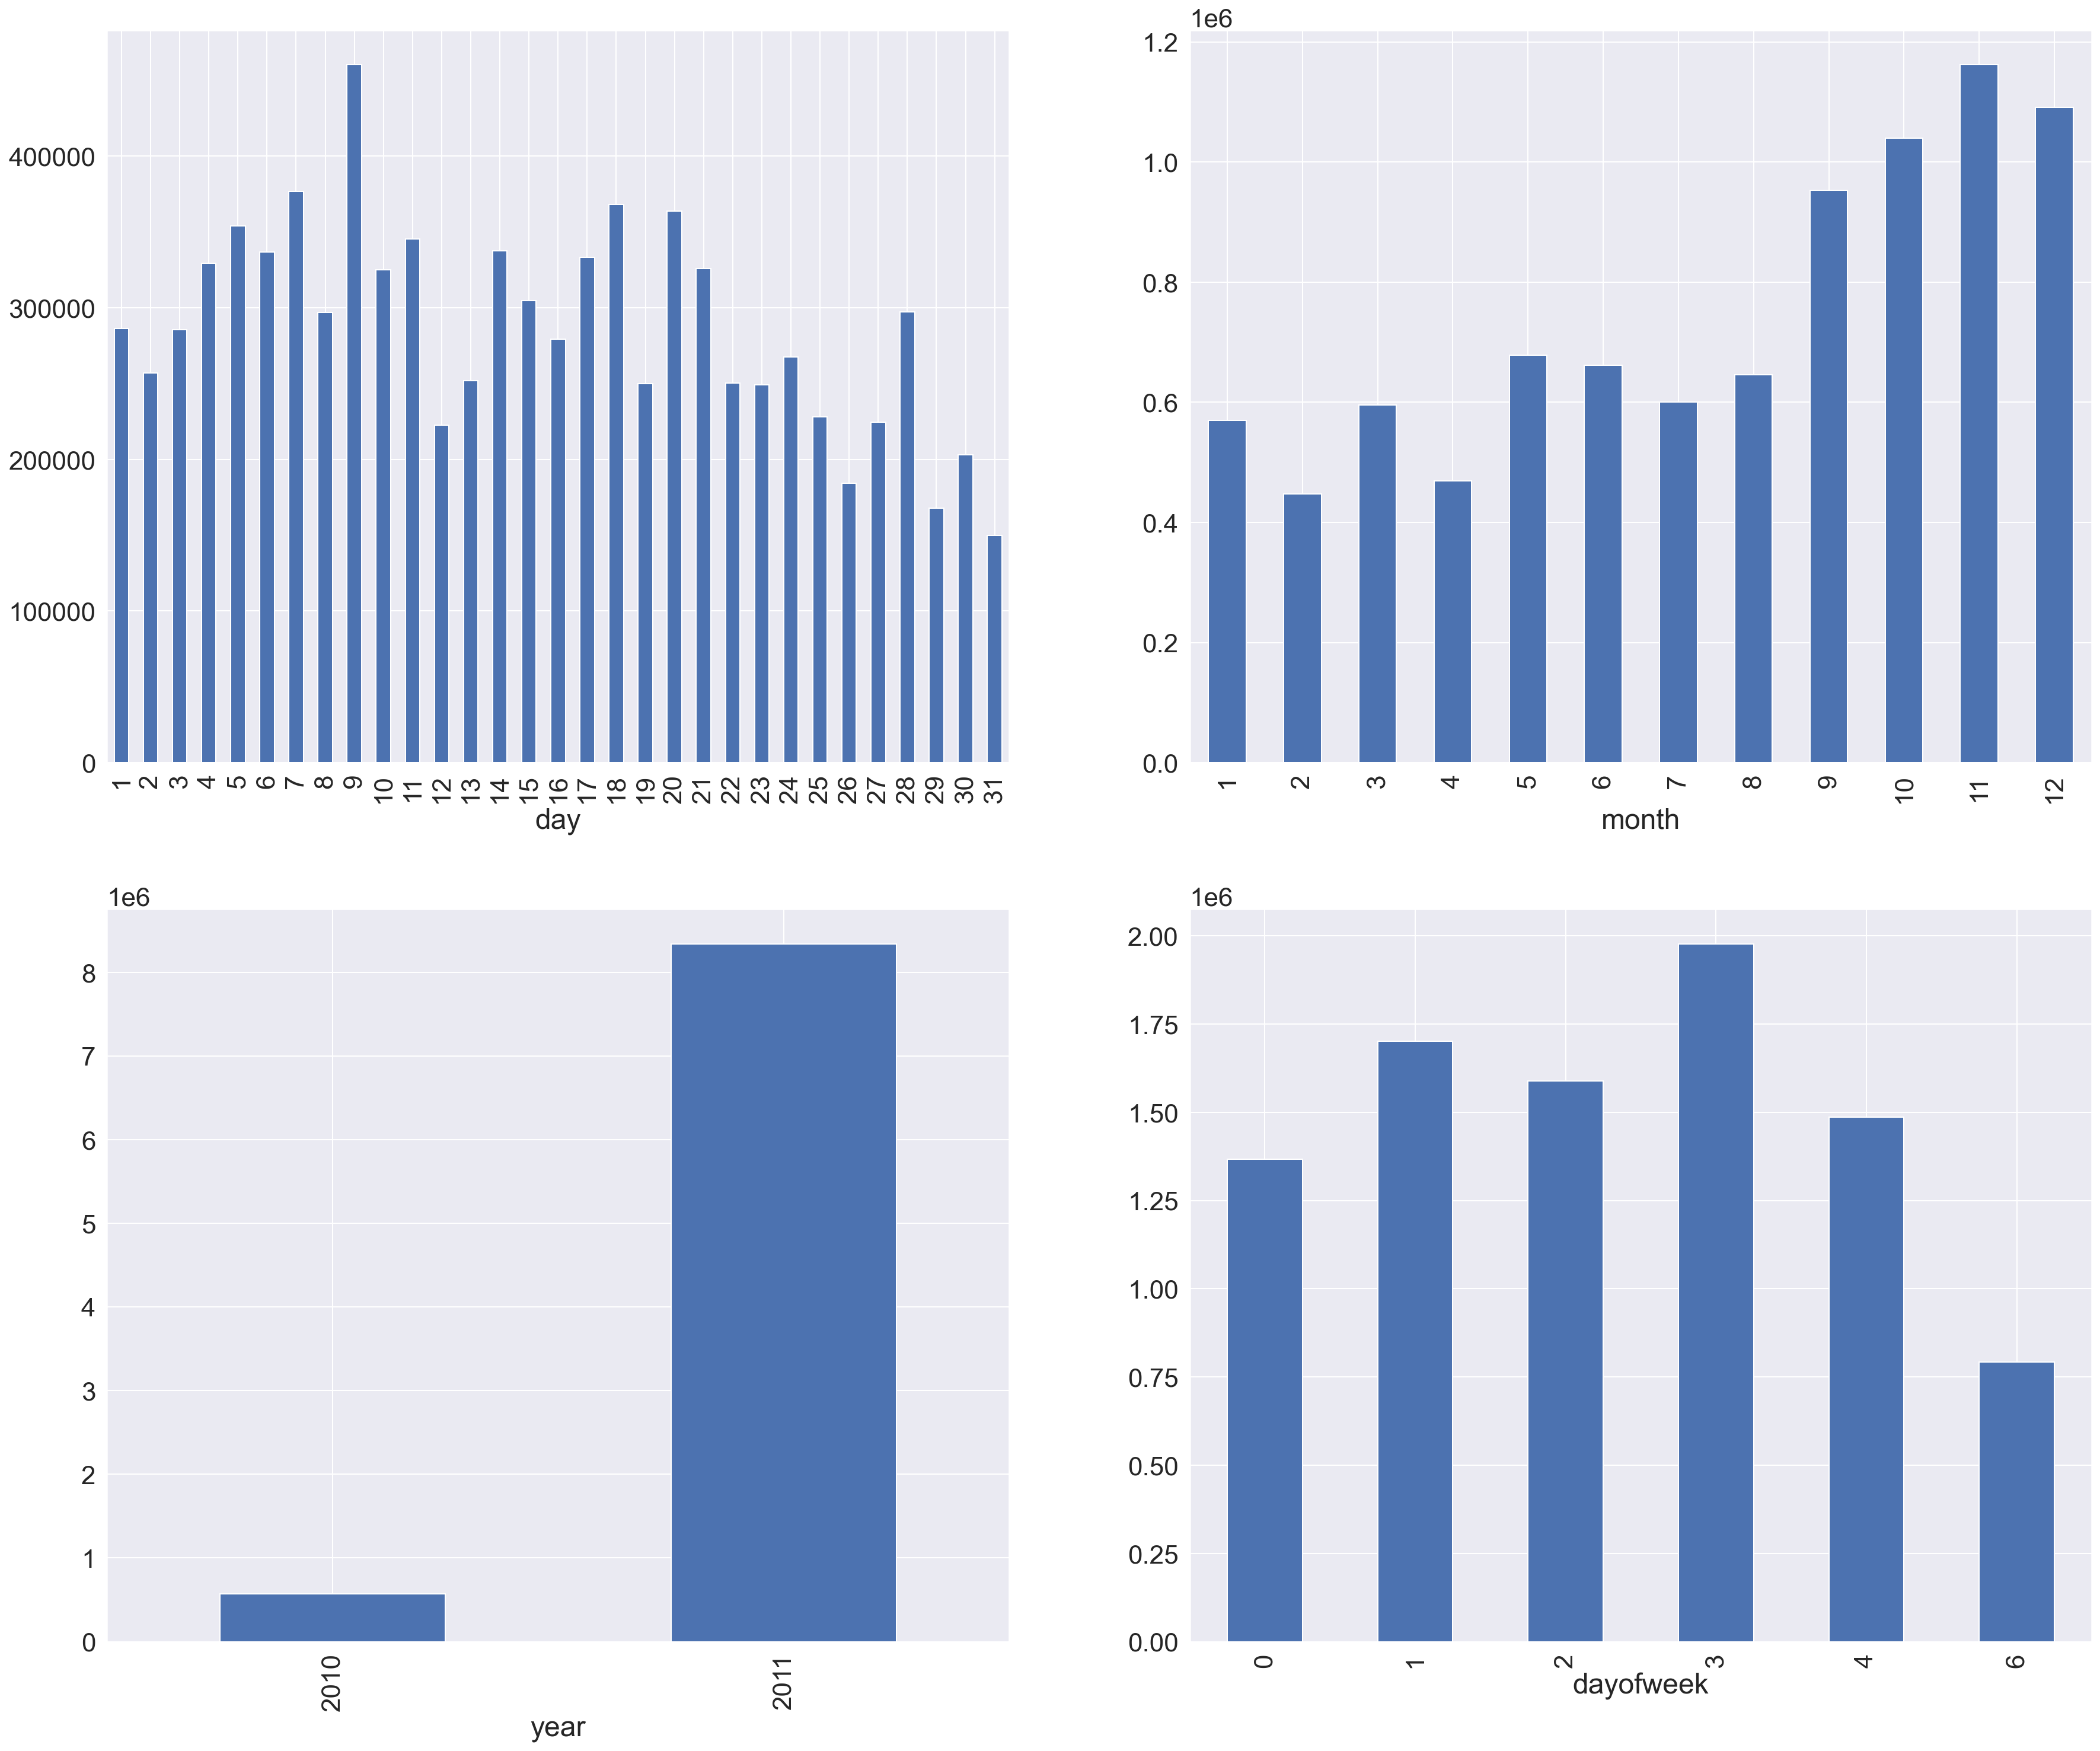

In [142]:
data['day'] = data['InvoiceDate'].dt.day
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['dayofweek'] = data['InvoiceDate'].dt.dayofweek

# 일별 매출 
day = data.groupby('day')['Price'].sum()
# 월별매출 
month = data.groupby('month')['Price'].sum()
# 연별 매출
year = data.groupby('year')['Price'].sum()
# 요일별 매출 : 0~6 월 ~ 일 
dayofweek = data.groupby('dayofweek')['Price'].sum()

plt.subplot(2,2,1)
day.plot(kind='bar')
plt.subplot(2,2,2)
month.plot(kind='bar')
plt.subplot(2,2,3)
year.plot(kind='bar')
plt.subplot(2,2,4)
dayofweek.plot(kind='bar')
plt.show()


### 요일별 매출

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
 8   Price        397884 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


- 월요일	0
- 화요일	1
- 수요일	2
- 목요일	3
- 금요일	4
- 토요일	5
- 일요일	6

In [73]:
df.iloc[0, 4]

Timestamp('2010-12-01 08:26:00')

In [74]:
df.iloc[0, 4].year

2010

In [75]:
df.iloc[0, 4].month

12

In [82]:
df.iloc[:, 4]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [90]:
df.iloc[:, 4]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

<BarContainer object of 6 artists>

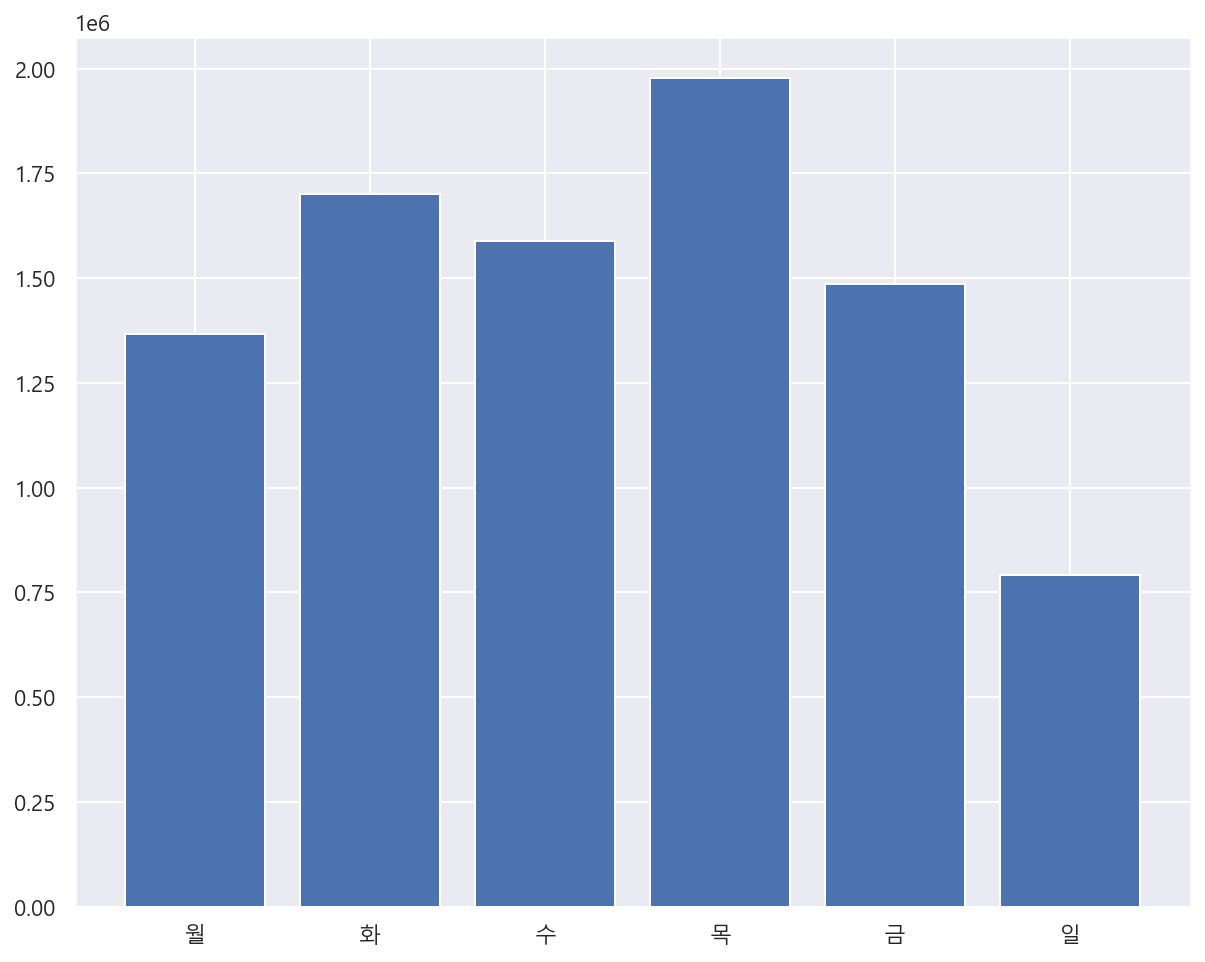

In [112]:
df['weekday'] = df['InvoiceDate'].dt.weekday
weekday = df.groupby('weekday').sum()
weekday.rename(index={0: '월', 1: '화', 2 : '수', 3 : '목', 4 : '금', 5 : '토', 6 : '일'}, inplace = True)
plt.bar(weekday.index, weekday['Price'])

In [98]:
df['weekday'] = df['InvoiceDate'].dt.weekday

In [101]:
weekday = df.groupby('weekday').sum()

In [102]:
weekday.index

Int64Index([0, 1, 2, 3, 4, 6], dtype='int64', name='weekday')

In [108]:
weekday.rename(index={0: '월', 1: '화', 2 : '수', 3 : '목', 4 : '금', 5 : '토', 6 : '일'}, inplace = True)

<BarContainer object of 6 artists>

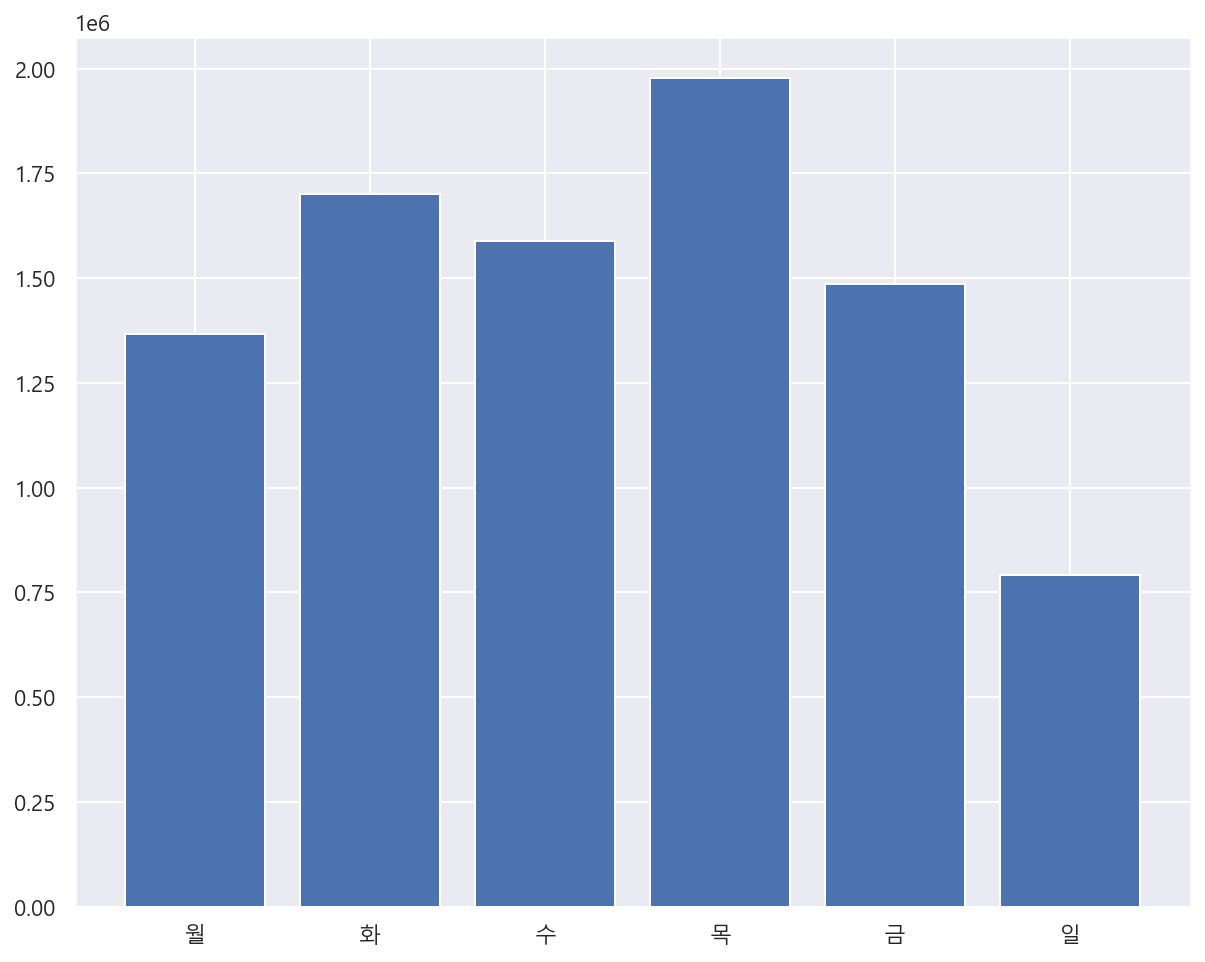

In [109]:
plt.bar(weekday.index, weekday['Price'])

In [114]:
df = df.set_index('InvoiceDate')

In [115]:
d_price =df.groupby(df.index.day_name())['Price'].sum().sort_values()

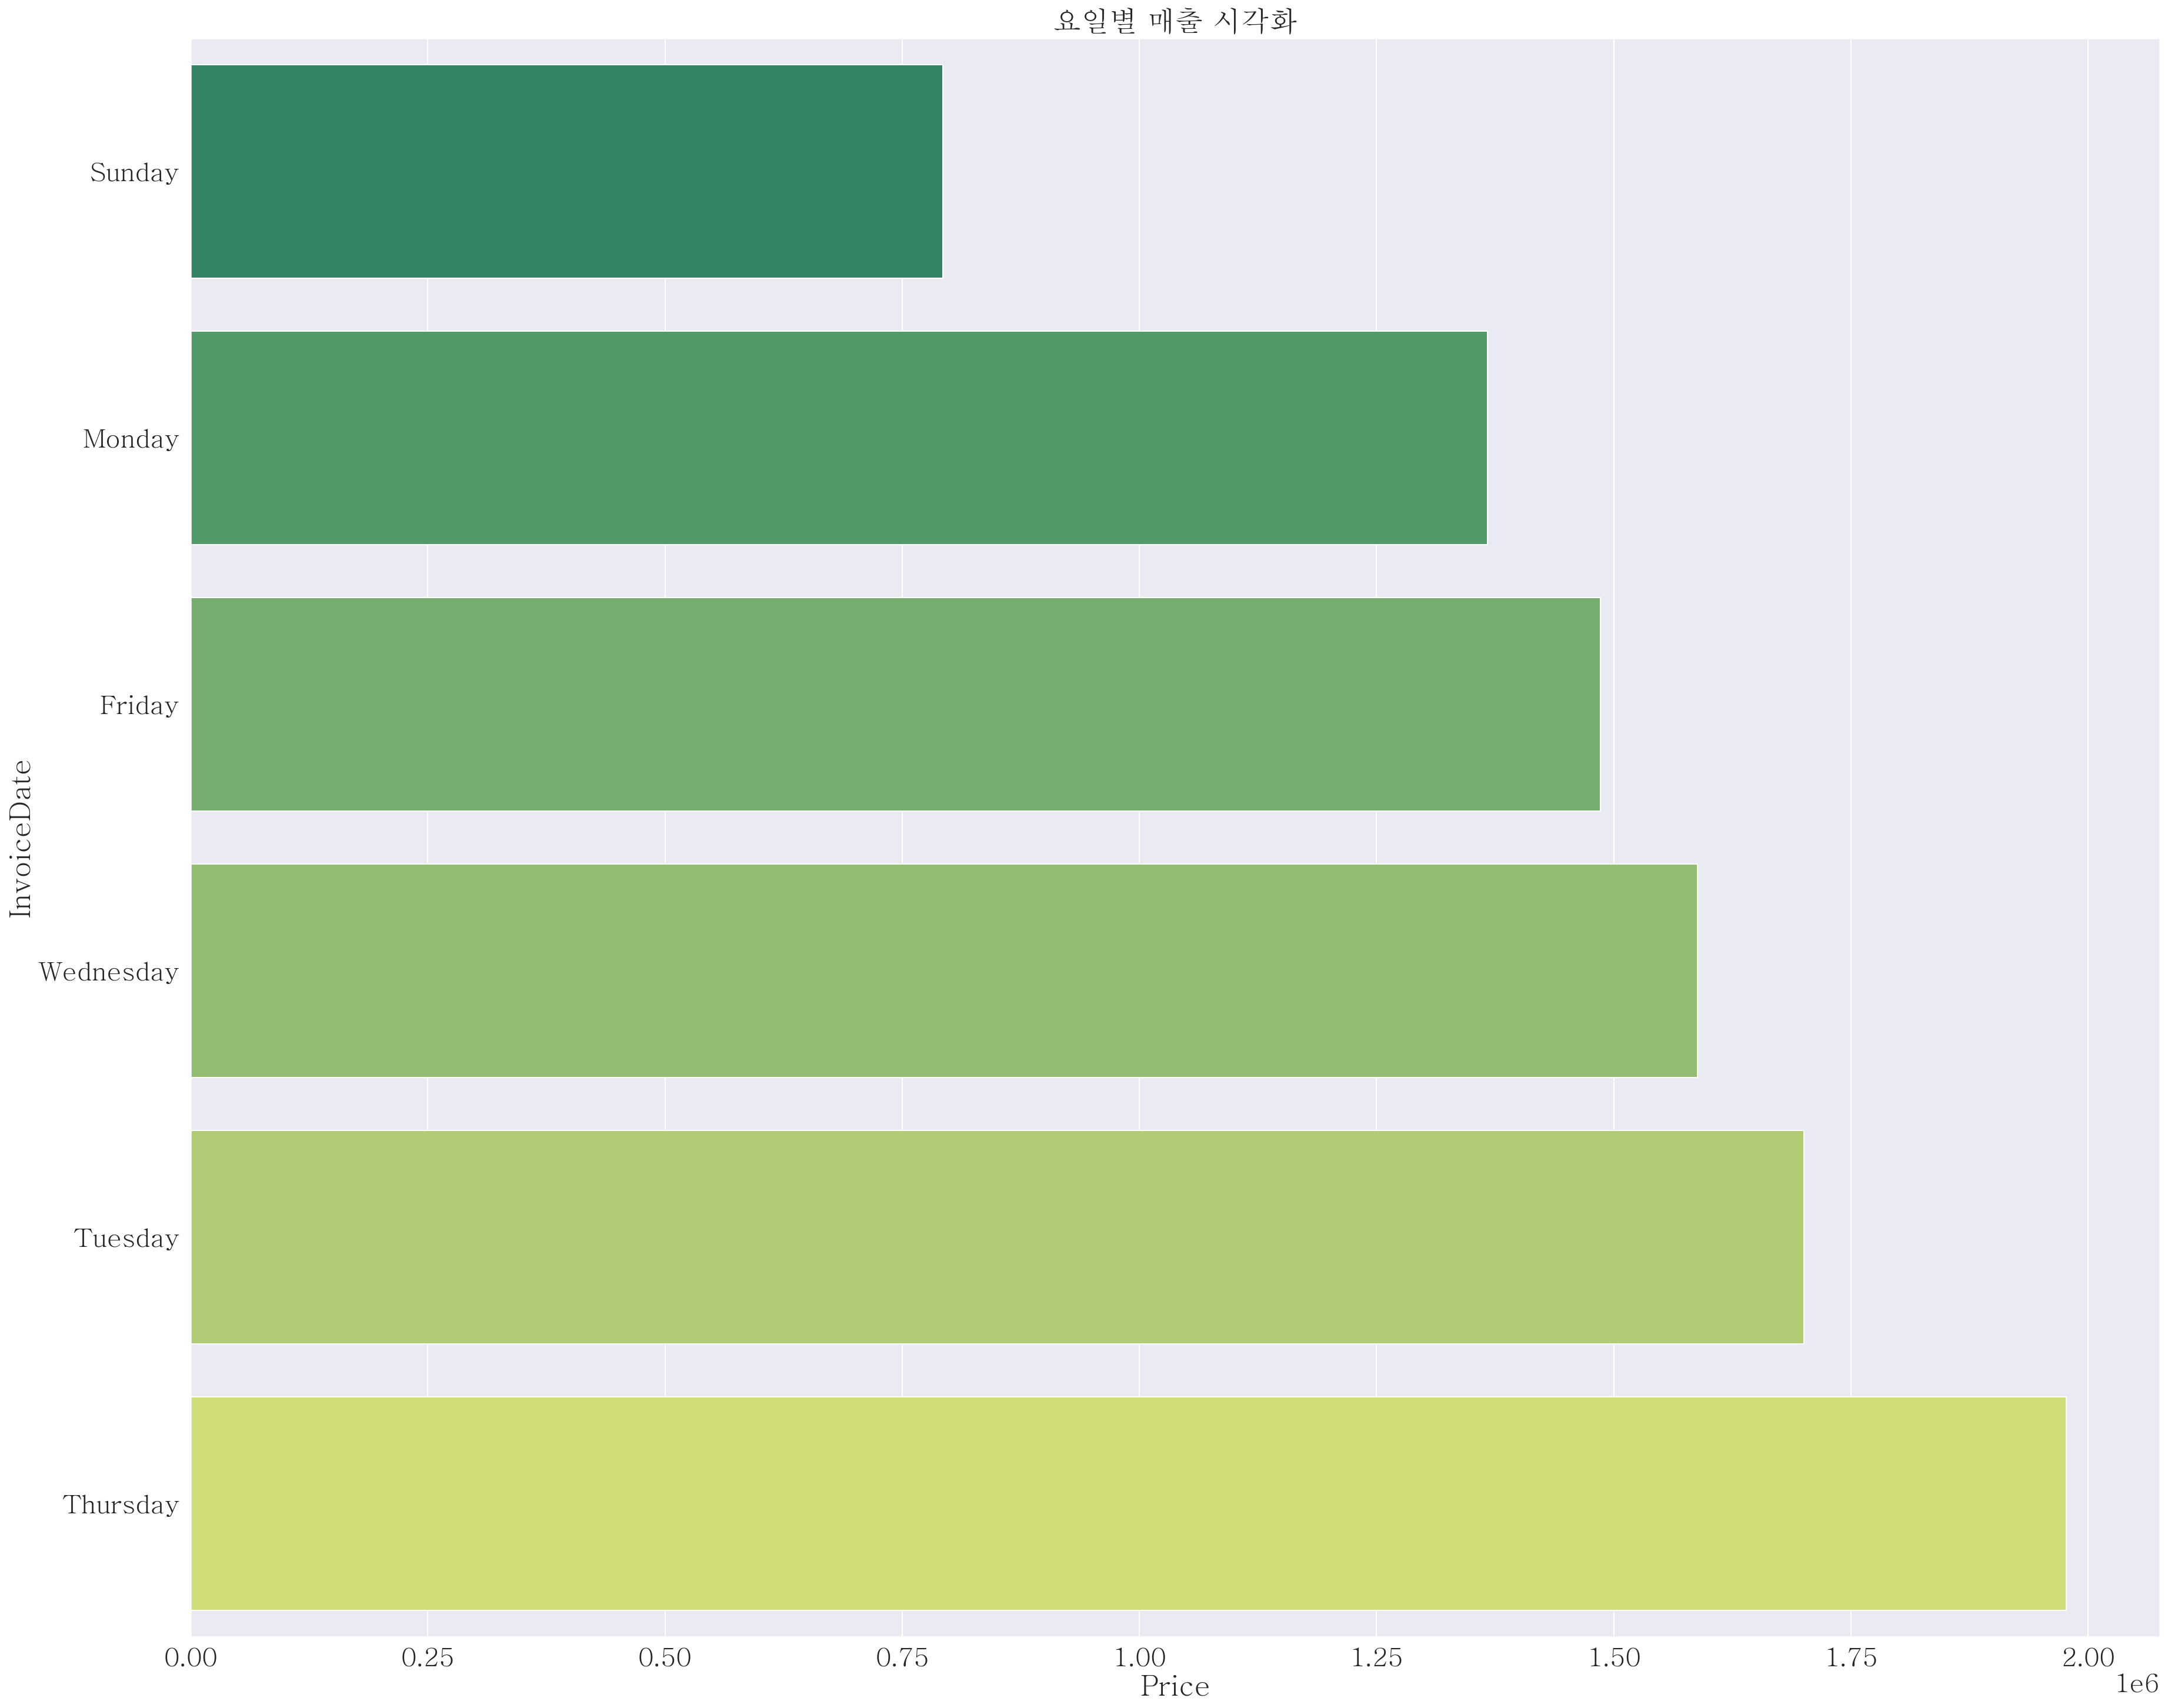

In [117]:
mpl.rcParams['font.family'] = 'batang'
sns.barplot(d_price,d_price.index, palette='summer')
sns.set(font_scale=2)
plt.title('요일별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

In [120]:
import platform
platform.python_version()

'3.9.7'

In [124]:
print(mpl.__version__)
sns.__version__

3.4.3


'0.11.2'

In [143]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 시간대별 매출, 상위 매출 제품의 월별 판매량 추이

### 시간대별 매출

In [154]:
df['hour'] = df['InvoiceDate'].dt.hour

In [159]:
hour = df.groupby('hour').sum()

<BarContainer object of 15 artists>

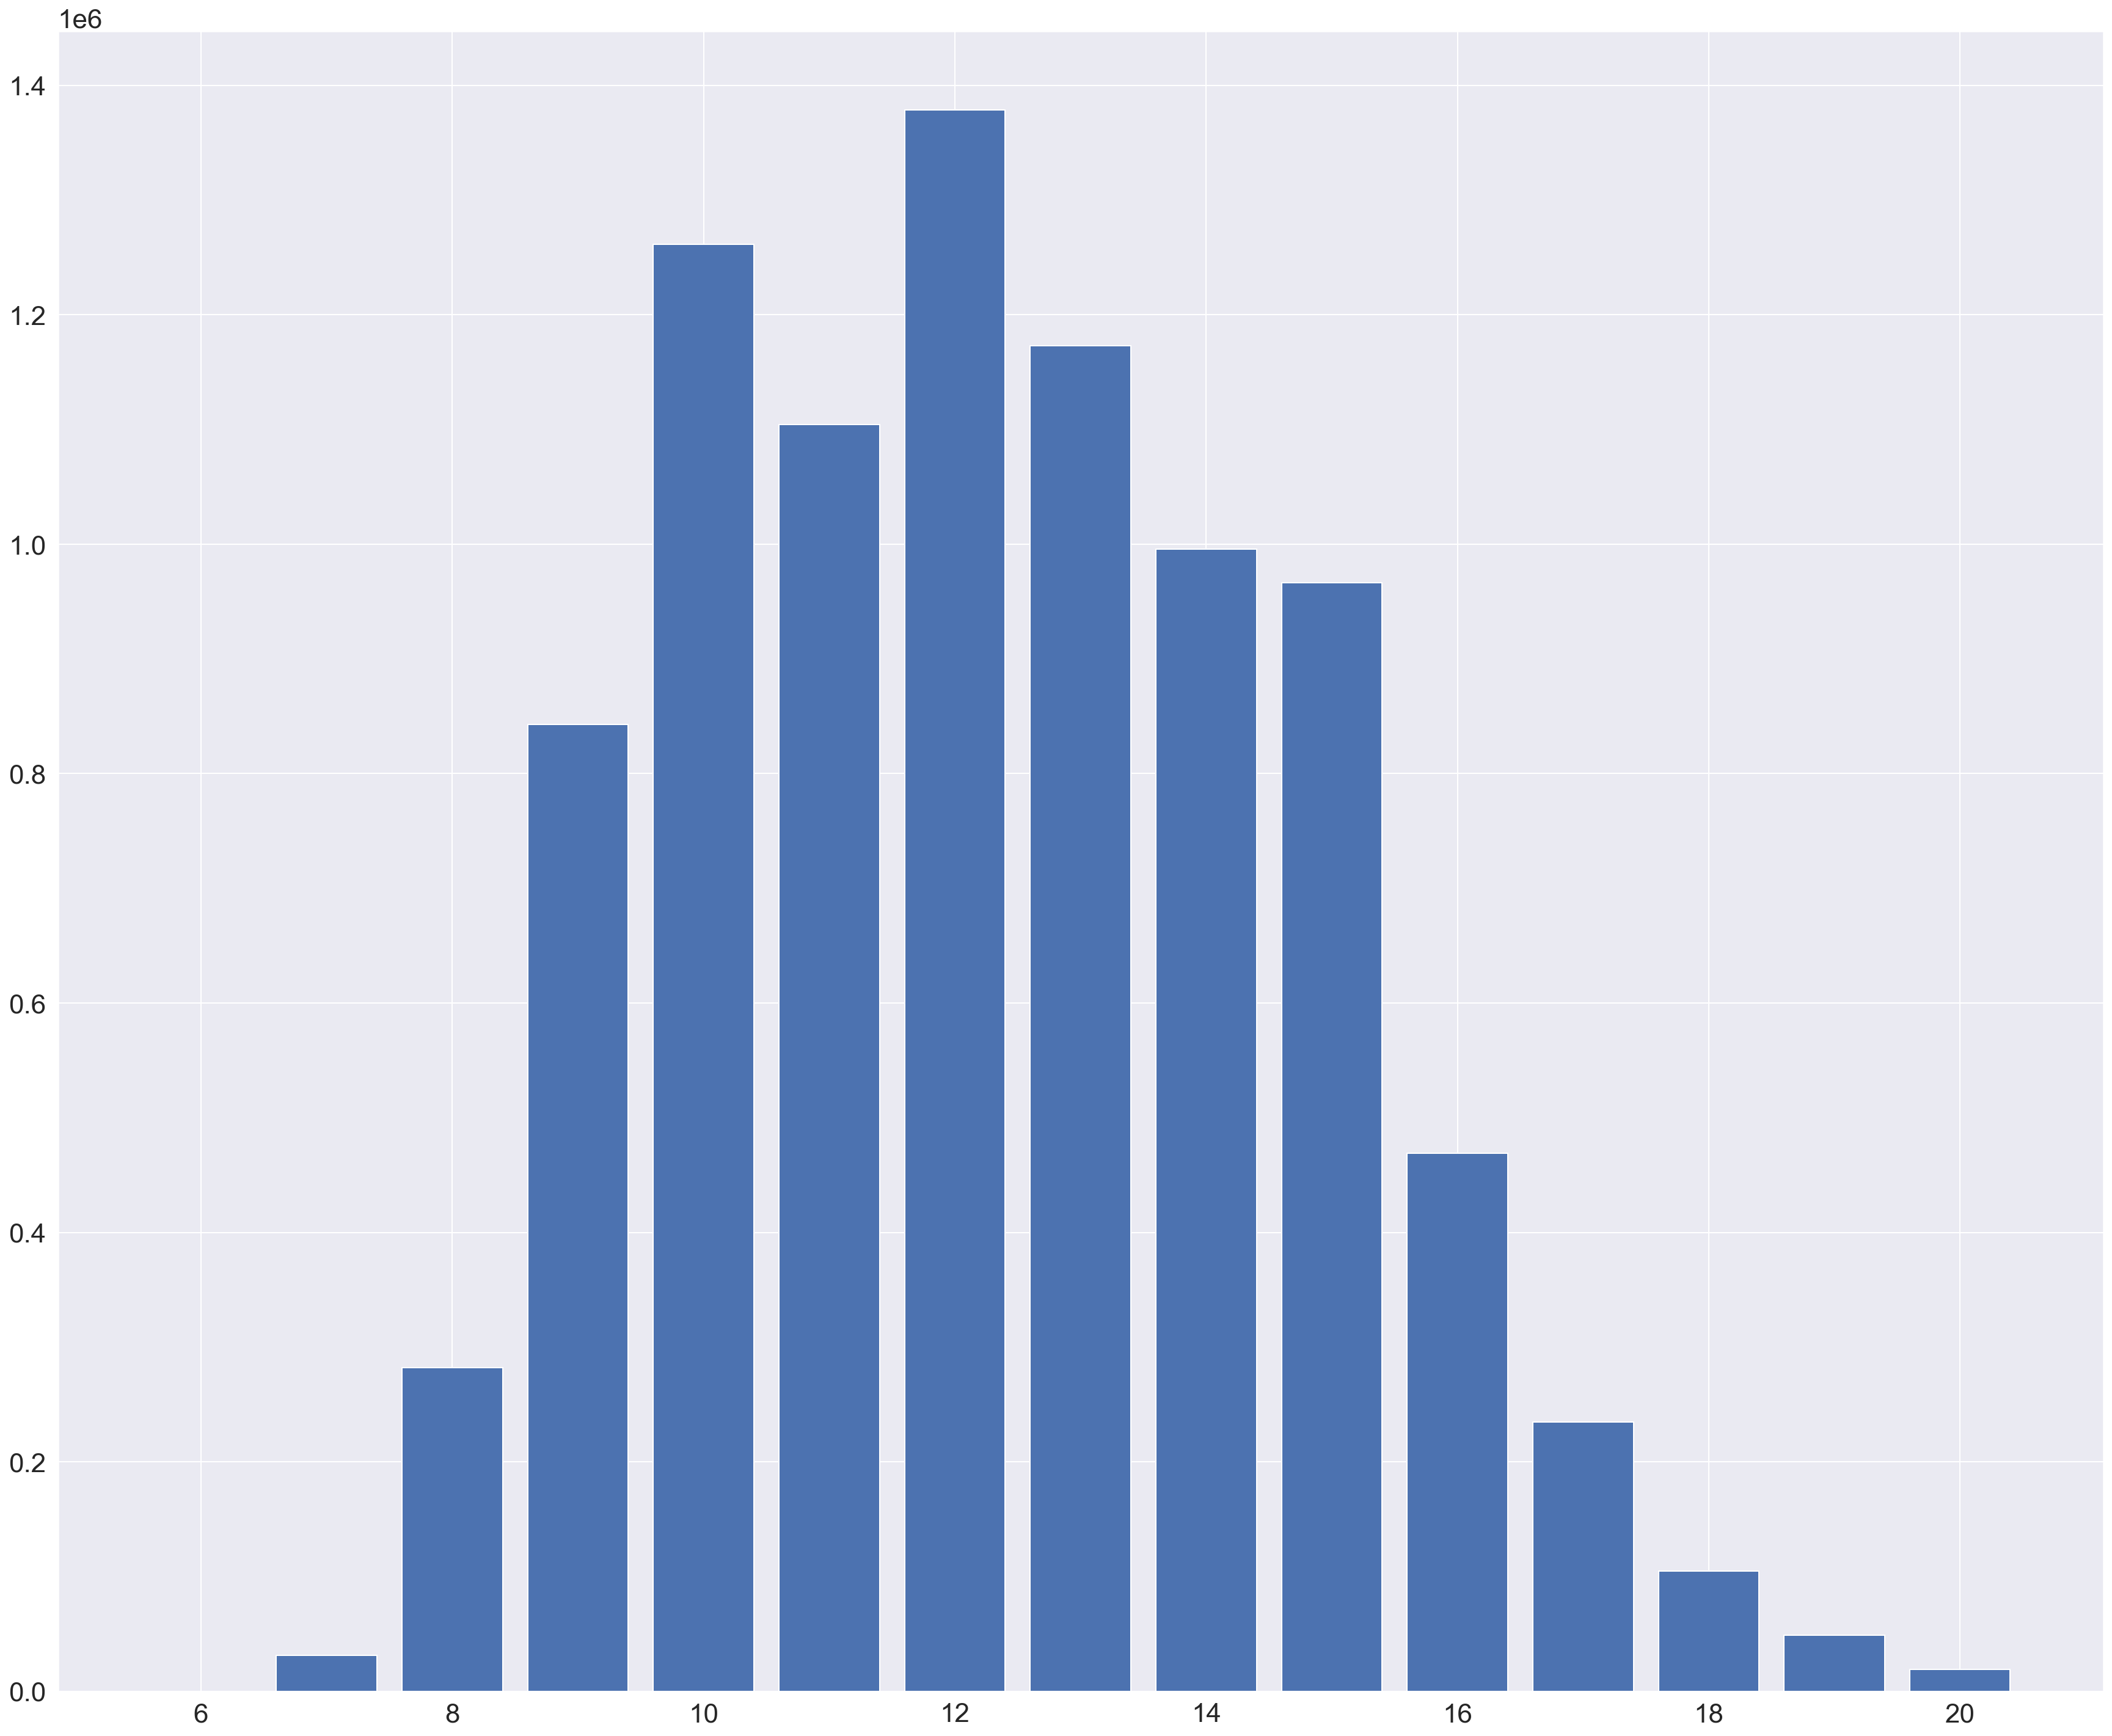

In [161]:
plt.bar(hour.index, hour['Price'])

### 상위 매출 제품의 월별 판매량 추이

In [187]:
df['month'] = df.InvoiceDate.dt.month

In [191]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,hour,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,12


In [197]:
df.groupby(['month', 'Description']).sum()['Price']

month  Description                     
1       4 PURPLE FLOCK DINNER CANDLES         5.10
        OVAL WALL MIRROR DIAMANTE           119.40
        SET 2 TEA TOWELS I LOVE LONDON     1110.15
       10 COLOUR SPACEBOY PEN               234.60
       12 COLOURED PARTY BALLOONS            52.00
                                            ...   
12     ZINC T-LIGHT HOLDER STARS SMALL      100.40
       ZINC TOP  2 DOOR WOODEN SHELF         16.95
       ZINC WILLIE WINKIE  CANDLE STICK     264.99
       ZINC WIRE KITCHEN ORGANISER           63.20
       ZINC WIRE SWEETHEART LETTER TRAY      16.25
Name: Price, Length: 29195, dtype: float64

In [174]:
df.groupby('Description').sum('Price').sort_values('Price', ascending = False).head()

,Quantity,UnitPrice,CustomerID,Price,hour
Description,,,,,
"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60,9
REGENCY CAKESTAND 3 TIER,12402,21508.90,25791979.0,142592.95,21600
WHITE HANGING HEART T-LIGHT HOLDER,36725,5867.22,31562068.0,100448.15,25609
JUMBO BAG RED RETROSPOT,46181,3261.69,24748363.0,85220.78,20026
MEDIUM CERAMIC TOP STORAGE JAR,77916,241.62,3047321.0,81416.73,2542


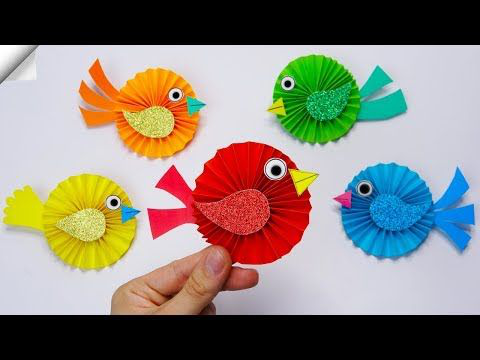

In [183]:
from PIL import Image
import os
import time

# 다운받을 이미지 url
url = "https://i.pinimg.com/564x/fd/fe/ea/fdfeea285066844c4a8778dcaec48ad8.jpg"

# curl 요청
os.system("curl " + url + " > test.jpg")

# 저장 된 이미지 확인
img = Image.open("test.jpg")

img

- PAPER CRAFT , LITTLE BIRDIE

In [202]:
## 전체 기간 중 매출액이 가장 큰 5가지 제품 선정
Top5 = df.groupby('Description').sum('Price').sort_values('Price', ascending = False).head(5).index

In [214]:
Top5

Index(['PAPER CRAFT , LITTLE BIRDIE', 'REGENCY CAKESTAND 3 TIER',
       'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT',
       'MEDIUM CERAMIC TOP STORAGE JAR'],
      dtype='object', name='Description')

In [210]:
'PAPER CRAFT , LITTLE BIRDIE' in Top5

True

In [216]:
df[df['Description'] == 'PAPER CRAFT , LITTLE BIRDIE'] ### 혼자서 81000개 구입?

## Top5에서 일단 제외하고 진행해보기로

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,hour,month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,9,12


In [215]:
df[df['Description'] == 'REGENCY CAKESTAND 3 TIER'] ## TOP 2 제품구매 확인

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,hour,month
880,536477,22423,REGENCY CAKESTAND 3 TIER,16,2010-12-01 12:27:00,10.95,16210.0,United Kingdom,175.20,12,12
936,536502,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:36:00,12.75,16552.0,United Kingdom,25.50,12,12
1092,536525,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:54:00,12.75,14078.0,United Kingdom,25.50,12,12
1155,536528,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:17:00,12.75,15525.0,United Kingdom,12.75,13,12
1197,536530,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:21:00,12.75,17905.0,United Kingdom,12.75,13,12
...,...,...,...,...,...,...,...,...,...,...,...
538944,581425,22423,REGENCY CAKESTAND 3 TIER,1,2011-12-08 15:31:00,12.75,14796.0,United Kingdom,12.75,15,12
539891,581449,22423,REGENCY CAKESTAND 3 TIER,1,2011-12-08 17:37:00,12.75,12748.0,United Kingdom,12.75,17,12
539892,581449,22423,REGENCY CAKESTAND 3 TIER,1,2011-12-08 17:37:00,12.75,12748.0,United Kingdom,12.75,17,12
540216,581472,22423,REGENCY CAKESTAND 3 TIER,2,2011-12-08 19:55:00,12.75,15796.0,United Kingdom,25.50,19,12


In [218]:
df[df['Description'] in Top5]

TypeError: unhashable type: 'Series'

## 고객 고호트(cohort) 분석

## 우수 고객 찾기( 금액/ 구매기간)

## 몇시에 push 마케팅을 하는게 제일 좋을까?

## 고객별 주문을 가장 많이 하는 시간은?